In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

In [172]:
def calculate_day_of_year(row):
    date = row['Date']
    year = row['Year']
    
    # Check if it's a leap year
    is_leap_year = year % 4 == 0
    
    # Calculate the day of the year normally
    day_of_year = date.dayofyear
    
    # If it's after February 28 in a leap year, subtract 1 to ignore Feb 29
    if is_leap_year and date.month > 2:
        day_of_year -= 1
    
    return int(day_of_year)

In [191]:
originalCSV = "nyc.csv"
modifiedPath = "nyc_post1980.csv"

In [192]:
key ='Mean.TemperatureF'
year = 1980
df = pd.read_csv(originalCSV, usecols=['Date', key,'season','Mean.Humidity'])
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df

,Date,Mean.TemperatureF,Mean.Humidity,season,Year
0,1948-07-01,78.0,65,Summer,1948
1,1948-07-02,72.0,51,Summer,1948
2,1948-07-03,71.0,62,Summer,1948
3,1948-07-04,76.0,67,Summer,1948
4,1948-07-05,82.0,71,Summer,1948
...,...,...,...,...,...
24555,2015-12-27,56.0,82,Winter,2015
24556,2015-12-28,42.0,57,Winter,2015
24557,2015-12-29,42.0,88,Winter,2015
24558,2015-12-30,46.0,85,Winter,2015


In [193]:
filtered_df = df[df['Date'].dt.year >= year]
filtered_df = filtered_df[~((filtered_df['Date'].dt.month == 2) & (filtered_df['Date'].dt.day == 29))]
filtered_df = filtered_df.reset_index(drop=True)

for index, row in filtered_df.iterrows():
    filtered_df.loc[index, 'Day'] = calculate_day_of_year(row)
    if (calculate_day_of_year(row)> 365):
        print(row)

filtered_df['Day'] = filtered_df['Day'].astype(int)
filtered_df

,Date,Mean.TemperatureF,Mean.Humidity,season,Year,Day
0,1980-01-01,34.0,56,Winter,1980,1
1,1980-01-02,36.0,65,Winter,1980,2
2,1980-01-03,32.0,73,Winter,1980,3
3,1980-01-04,25.0,79,Winter,1980,4
4,1980-01-05,27.0,70,Winter,1980,5
...,...,...,...,...,...,...
13041,2015-12-27,56.0,82,Winter,2015,361
13042,2015-12-28,42.0,57,Winter,2015,362
13043,2015-12-29,42.0,88,Winter,2015,363
13044,2015-12-30,46.0,85,Winter,2015,364


In [194]:
df_2001 = df[df['Date'].dt.year == 2001].copy()
df_1999 = df[df['Date'].dt.year == 1999].copy()

In [195]:
date_range = pd.date_range(start="2000-01-01", end="2000-12-31", freq='D')
year2000 = filtered_df[filtered_df['Date'].dt.year == 2000]
missing_dates = date_range.difference(year2000['Date'])
missing_df = pd.DataFrame()


for missing_date in missing_dates:
    if missing_date.month == 2 and missing_date.day == 29:
        continue
    date_in_1999 = missing_date.replace(year=1999)
    date_in_2001 = missing_date.replace(year=2001)
    
    # Get the rows for 1999 and 2001
    row_1999 = df_1999[df_1999['Date'] == date_in_1999]
    row_2001 = df_2001[df_2001['Date'] == date_in_2001]
    
    # If both years have data for that date
    if not row_1999.empty and not row_2001.empty:
        # Calculate the average for each column (e.g., Mean.TemperatureF, Mean.Humidity)
        avg_temp = (row_1999['Mean.TemperatureF'].values[0] + row_2001['Mean.TemperatureF'].values[0]) / 2
        avg_humidity = (row_1999['Mean.Humidity'].values[0] + row_2001['Mean.Humidity'].values[0]) / 2
        
        day_of_year = missing_date.dayofyear
        if missing_date.month > 2:
            day_of_year -= 1

        # Add the missing row to df_2000
        missing_row = pd.DataFrame({
            'Date': [missing_date],
            'Mean.TemperatureF': [avg_temp],
            'Mean.Humidity': [avg_humidity],
            'season': [row_1999['season'].values[0]],  # Assuming season is the same
            'Year': [2000],
            'Day': [day_of_year]
        })
        
        missing_df = pd.concat([missing_df, missing_row], ignore_index=True)

missing_df

,Date,Mean.TemperatureF,Mean.Humidity,season,Year,Day
0,2000-02-23,24.5,55.5,Winter,2000,54
1,2000-02-24,29.5,53.0,Winter,2000,55
2,2000-02-25,36.0,88.0,Winter,2000,56
3,2000-02-26,40.5,62.5,Winter,2000,57
4,2000-02-27,40.0,61.0,Winter,2000,58
...,...,...,...,...,...,...
89,2000-08-25,72.0,76.0,Summer,2000,237
90,2000-08-26,72.0,84.5,Summer,2000,238
91,2000-08-28,77.5,76.5,Summer,2000,240
92,2000-08-29,76.5,66.5,Summer,2000,241


In [196]:

df_2000_complete = pd.concat([filtered_df, missing_df], ignore_index=True)
df_2000_complete = df_2000_complete.sort_values('Date').reset_index(drop=True)
df_2000_complete

,Date,Mean.TemperatureF,Mean.Humidity,season,Year,Day
0,1980-01-01,34.0,56.0,Winter,1980,1
1,1980-01-02,36.0,65.0,Winter,1980,2
2,1980-01-03,32.0,73.0,Winter,1980,3
3,1980-01-04,25.0,79.0,Winter,1980,4
4,1980-01-05,27.0,70.0,Winter,1980,5
...,...,...,...,...,...,...
13135,2015-12-27,56.0,82.0,Winter,2015,361
13136,2015-12-28,42.0,57.0,Winter,2015,362
13137,2015-12-29,42.0,88.0,Winter,2015,363
13138,2015-12-30,46.0,85.0,Winter,2015,364


In [197]:
for index, row in df_2000_complete.iterrows():
    if (pd.isna(row['Mean.TemperatureF']) or pd.isnull(row['Mean.TemperatureF'])):
        date_in_1999 = row['Date'].replace(year=1999)
        date_in_2001 = row['Date'].replace(year=2001)
        
        # Get the rows for 1999 and 2001
        row_1999 = df_1999[df_1999['Date'] == date_in_1999]
        row_2001 = df_2001[df_2001['Date'] == date_in_2001]
        df_2000_complete.at[index, 'Mean.TemperatureF'] = (
                row_1999['Mean.TemperatureF'].values[0] + row_2001['Mean.TemperatureF'].values[0]
            ) / 2
    if (pd.isna(row['Mean.Humidity']) or pd.isnull(row['Mean.Humidity'])):
        date_in_1999 = row['Date'].replace(year=1999)
        date_in_2001 = row['Date'].replace(year=2001)
        
        # Get the rows for 1999 and 2001
        row_1999 = df_1999[df_1999['Date'] == date_in_1999]
        row_2001 = df_2001[df_2001['Date'] == date_in_2001]
        df_2000_complete.at[index, 'Mean.Humidity'] = (
                row_1999['Mean.Humidity'].values[0] + row_2001['Mean.Humidity'].values[0]
            ) / 2

In [198]:
df_2000_complete

,Date,Mean.TemperatureF,Mean.Humidity,season,Year,Day
0,1980-01-01,34.0,56.0,Winter,1980,1
1,1980-01-02,36.0,65.0,Winter,1980,2
2,1980-01-03,32.0,73.0,Winter,1980,3
3,1980-01-04,25.0,79.0,Winter,1980,4
4,1980-01-05,27.0,70.0,Winter,1980,5
...,...,...,...,...,...,...
13135,2015-12-27,56.0,82.0,Winter,2015,361
13136,2015-12-28,42.0,57.0,Winter,2015,362
13137,2015-12-29,42.0,88.0,Winter,2015,363
13138,2015-12-30,46.0,85.0,Winter,2015,364


In [199]:
df_2000_complete.to_csv(modifiedPath, index=False)

DONE

In [171]:
grouped = df.groupby([df['Date'].dt.year])[ key].apply(list)
grouped_2 = df.groupby([df['Date'].dt.year,'season'])[ key].apply(list)
grouped_nested = grouped.to_dict()
grouped_nested

{1948: [74.0,
  75.0,
  66.0,
  64.0,
  57.0,
  60.0,
  62.0,
  66.0,
  66.0,
  67.0,
  66.0,
  70.0,
  73.0,
  56.0,
  43.0,
  55.0,
  66.0,
  60.0,
  65.0,
  72.0,
  72.0,
  64.0,
  66.0,
  74.0,
  72.0,
  72.0,
  72.0,
  72.0,
  71.0,
  72.0,
  74.0,
  58.0,
  60.0,
  63.0,
  70.0,
  68.0,
  70.0,
  70.0,
  73.0,
  74.0,
  70.0,
  75.0,
  78.0,
  78.0,
  78.0,
  68.0,
  75.0,
  75.0,
  71.0,
  69.0,
  68.0,
  69.0,
  68.0,
  71.0,
  72.0,
  70.0,
  70.0,
  68.0,
  73.0,
  74.0,
  74.0,
  77.0,
  78.0,
  77.0,
  74.0,
  74.0,
  77.0,
  76.0,
  77.0,
  80.0,
  80.0,
  75.0,
  74.0,
  70.0,
  75.0,
  78.0,
  78.0,
  75.0,
  78.0,
  77.0,
  78.0,
  78.0,
  78.0,
  79.0,
  76.0,
  76.0,
  75.0,
  78.0,
  67.0,
  68.0,
  78.0,
  80.0,
  82.0,
  78.0,
  74.0,
  75.0,
  77.0,
  76.0,
  74.0,
  74.0,
  76.0,
  76.0,
  78.0,
  nan,
  77.0,
  74.0,
  75.0,
  75.0,
  72.0,
  74.0,
  72.0,
  70.0,
  70.0,
  73.0,
  76.0,
  75.0,
  77.0,
  74.0,
  76.0,
  79.0,
  72.0,
  73.0,
  74.0,
  78.0,
  7

In [907]:
from1949 = {key: value for key, value in grouped_nested.items() if key > year}
new_dict = from1949
for i in from1949:
    if (len(from1949[i]) > 365):
        print(str(i) + "larger: " + str(len(from1949[i])))
        new_dict[i] = from1949[i][:365]
    elif (len(from1949[i]) < 365):
        print(str(i) + "smaller: " + str(len(from1949[i])))
        new_dict = {key: value for key, value in new_dict.items() if key != i}

1984larger: 366
1988larger: 366
1992larger: 366
1996larger: 366
2000smaller: 272
2004larger: 366
2008larger: 366
2012larger: 366


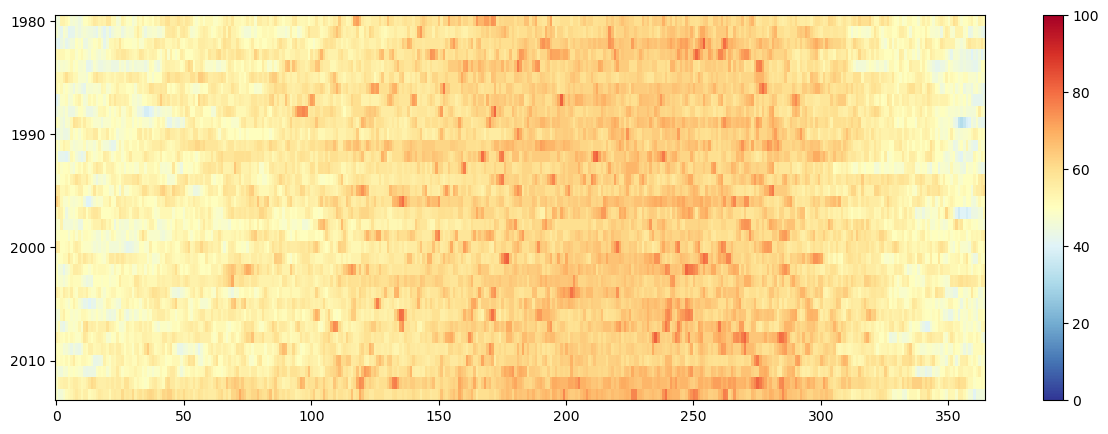

In [908]:
heat_array = np.array(list(new_dict.values()))
#heat_array = np.transpose(heat_array)
plt.figure(figsize=(15, 5))
plt.imshow(heat_array, cmap='RdYlBu_r', interpolation='nearest', aspect='auto',  vmin=0, vmax=100)
tick_positions = [0, 10, 20, 30]  # Tick positions should match the number of labels
tick_labels = [1980, 1990, 2000, 2010]
plt.yticks(tick_positions, tick_labels)
plt.colorbar()

In [909]:
group2_cleaned = {key: value for key, value in grouped_2.items() if key[0] > year}
group2_cleaned = {key: value for key, value in group2_cleaned.items() if key[1] == 'Summer'}
group2_cleaned

{(1981, 'Summer'): [74.0,
  73.0,
  60.0,
  62.0,
  61.0,
  62.0,
  62.0,
  62.0,
  62.0,
  60.0,
  62.0,
  61.0,
  61.0,
  66.0,
  66.0,
  60.0,
  64.0,
  68.0,
  60.0,
  59.0,
  58.0,
  58.0,
  64.0,
  71.0,
  57.0,
  58.0,
  58.0,
  60.0,
  60.0,
  60.0,
  60.0,
  57.0,
  60.0,
  60.0,
  58.0,
  62.0,
  64.0,
  61.0,
  62.0,
  62.0,
  59.0,
  59.0,
  60.0,
  60.0,
  60.0,
  64.0,
  62.0,
  64.0,
  61.0,
  62.0,
  64.0,
  66.0,
  64.0,
  63.0,
  62.0,
  62.0,
  60.0,
  60.0,
  60.0,
  65.0,
  62.0,
  64.0,
  60.0,
  63.0,
  64.0,
  63.0,
  63.0,
  69.0,
  64.0,
  61.0,
  64.0,
  60.0,
  64.0,
  61.0,
  62.0,
  60.0,
  66.0,
  62.0,
  60.0,
  60.0,
  59.0,
  60.0,
  61.0,
  63.0,
  64.0,
  60.0,
  60.0,
  64.0,
  64.0,
  62.0,
  66.0,
  61.0,
  64.0,
  62.0],
 (1982, 'Summer'): [62.0,
  62.0,
  63.0,
  64.0,
  66.0,
  68.0,
  64.0,
  60.0,
  62.0,
  60.0,
  58.0,
  60.0,
  60.0,
  60.0,
  62.0,
  62.0,
  60.0,
  64.0,
  62.0,
  62.0,
  60.0,
  68.0,
  64.0,
  66.0,
  64.0,
  57.0,
  6

In [910]:

x = [s for s in range(0,len(group2_cleaned))]
heat_mean = [np.mean(s) for s in group2_cleaned.values()]
heat_min = [np.min(s) for s in group2_cleaned.values()]
heat_max = [np.max(s) for s in group2_cleaned.values()]

(40.0, 90.0)

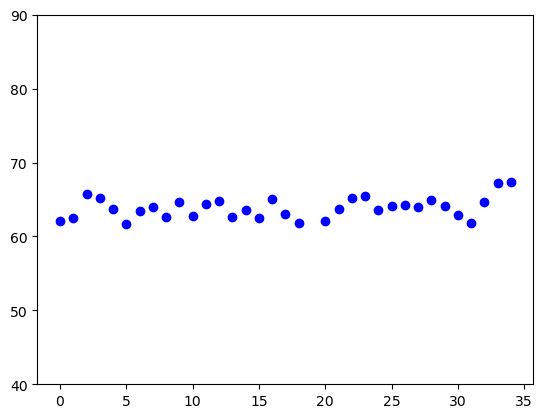

In [911]:

plt.scatter(x, y = heat_mean, label=" Plot", color='blue')
plt.ylim(40, 90)
#plt.fill_between(x,y1=heat_min, y2=heat_max, color='lightblue', alpha=0.5, label="Range")

(40.0, 90.0)

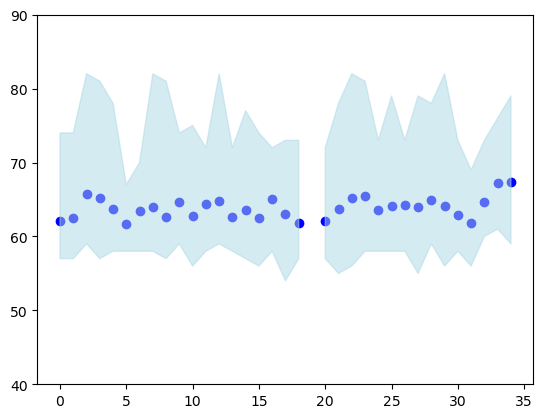

In [912]:

plt.scatter(x, y = heat_mean, label=" Plot", color='blue')
plt.fill_between(x,y1=heat_min, y2=heat_max, color='lightblue', alpha=0.5, label="Range")
plt.ylim(40, 90)

In [913]:
index = [np.full(len(heat_array[i]), i) for i in range (len(heat_array))]
flattend = heat_array.flatten()
x = [s for s in range(0,len(new_dict))]
heat_mean = [np.mean(s) for s in new_dict.values()]
heat_min = [np.min(s) for s in new_dict.values()]
heat_max = [np.max(s) for s in new_dict.values()]

(45.0, 60.0)

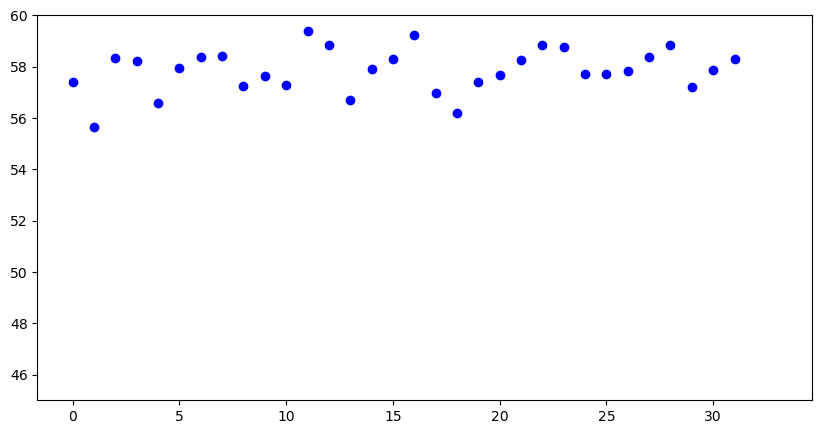

In [914]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y = heat_mean, label=" Plot", color='blue')
plt.ylim(45, 60)

(0.0, 100.0)

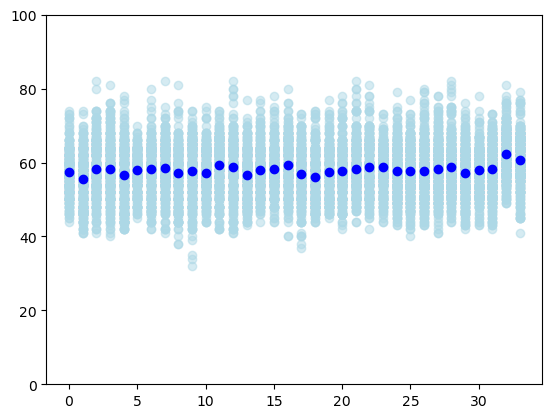

In [915]:
plt.scatter(index,y=flattend, color='lightblue', alpha=0.5, label="Range")
plt.scatter(x, y = heat_mean, label=" Plot", color='blue')

plt.ylim(0, 100)